# Introduction

The Gender Pay Gap (GPG) is defined as *“the difference between the amounts of money paid to women and men, often for doing the same work” (Smith, 2012).* It is a measurable indicator of gender equality.
In France, the gender wage gap still puts female professionals at a notable disadvantage. In 2019, the European average wage gap was improved, dropping to 19.1% while France saw a rise in the gender wage gap, climbing to 16%, the 10th highest in the European Union.
The new law requires all French employers with at least 50 employees to seek to eliminate gender pay gaps.
Machine learning can address the issue of gender disparity by building a prediction model of the male and female mean wage.
A Regression model tells us the separate impact of each factor on pay — gender, as well as other factors — and shows us whether males have a pay advantage or not.
The model could help to identify gender disparities and understand the root factors of the gender gap.
*Some of the scripts below were inspired by the Github community (Plotting of the France map for example).*

# Methods

Here, load and describe the data. Discuss and do any processing to the data in this section. 

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

## Loading salary Dataset

Loading 2019 INSEE Salary Dataset *(https://www.insee.fr/fr/statistiques/2021266#consulter)* : The salary dataset comes from INSEE (the French National Institute of statistics).
(It was difficult to find other official sources of French wages due to the nature of data and the French regulations of personal data storage).
The salary dataset contains key information on the mean net SALARY per HOUR of French citizens according to their place of residence (towns), gender, occupation level, and age. The data is aggregated by town, gender, age and occupation level.
Various files are available depending on groupings: per town (5000 towns), per county (300 counties), per region, etc...
I finally chose to train the model on the county-based regrouping because of performance issues I encountered with the 5000-towns' data (by performing TreeExplainer with RandomForest).
The town-based file was finally used to plot the locations on a map for analysis.
A dataset of French geographic information is also loaded for the location analysis.

In [2]:
salary = pd.read_excel("bases-salary-fr-county town-2019-full.xlsx")
salary_2 = pd.read_excel("bases-salary-mean-FR-2019-per town.xlsx")
geo = pd.read_excel("name_geographic_information.xlsx")
#salary = pd.read_excel("bases-salary-fr-county town-2019.xlsx")

## Exploring the Dataset

In [3]:
salary.head()

,CODGEO,LIBGEO,SNHM19,SNHMC19,SNHMP19,SNHME19,SNHMO19,SNHMF19,SNHMFC19,SNHMFP19,...,SNHMH2619,SNHMHO2619,SNHMHE2619,SNHMHP2619,SNHMHC2619,SNHMH5019,SNHMHO5019,SNHMHE5019,SNHMHP5019,SNHMHC5019
0,011,Belley,14.674120,25.007347,15.726516,11.260015,12.027875,12.979755,21.758588,14.219631,...,15.749377,14.073065,13.916257,16.290848,21.124285,18.328561,15.362657,15.205849,17.580440,22.413876
1,012,Bourg-en-Bresse,14.963101,25.435744,15.573986,11.440566,11.968623,13.289413,22.104039,14.272798,...,15.937717,14.111229,14.108847,16.304506,21.463635,18.996117,15.640429,15.638047,17.833706,22.992836
2,013,Gex,14.211622,27.637872,14.955071,11.110508,12.148767,13.110850,24.470887,14.198416,...,15.184363,13.807217,13.168664,15.529799,22.358584,18.195413,15.312742,14.674189,17.035324,23.864109
3,014,Nantua,13.627188,24.261667,15.194385,11.190374,11.674767,12.150629,21.281913,13.550595,...,14.504693,13.323393,13.077700,15.392500,20.028604,16.665603,14.403848,14.158154,16.472955,21.109059
4,021,Château-Thierry,13.908805,23.688602,15.654075,11.222631,12.165498,12.632217,21.179761,14.423923,...,14.466056,13.483468,13.080702,15.521993,19.640545,16.776539,14.638710,14.235943,16.677234,20.795787


In [282]:
geo.head()

,EU_circo,code_region,nom_region,chef.lieu_region,numero_departement,nom_departement,prefecture,numero_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,eloignement
0,Sud-Est,82,Rhone-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Attignat,1340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhone-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beaupont,1270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhone-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Beny,1370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhone-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bereyziat,1340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhone-Alpes,Lyon,1,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,1250,1245,46.133333,5.4,1.01


In [62]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_region             36840 non-null  int64  
 2   nom_region              36840 non-null  object 
 3   chef.lieu_region        36840 non-null  object 
 4   numero_departement      36840 non-null  object 
 5   nom_departement         36840 non-null  object 
 6   prefecture              36840 non-null  object 
 7   numero_circonscription  36840 non-null  int64  
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  code_insee              36840 non-null  int64  
 11  latitude                33911 non-null  float64
 12  longitude               33999 non-null  object 
 13  eloignement             33878 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 50 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CODGEO      332 non-null    object 
 1   LIBGEO      332 non-null    object 
 2   SNHM19      332 non-null    float64
 3   SNHMC19     332 non-null    float64
 4   SNHMP19     332 non-null    float64
 5   SNHME19     332 non-null    float64
 6   SNHMO19     332 non-null    float64
 7   SNHMF19     332 non-null    float64
 8   SNHMFC19    332 non-null    float64
 9   SNHMFP19    332 non-null    float64
 10  SNHMFE19    332 non-null    float64
 11  SNHMFO19    332 non-null    float64
 12  SNHMH19     332 non-null    float64
 13  SNHMHC19    332 non-null    float64
 14  SNHMHP19    332 non-null    float64
 15  SNHMHE19    332 non-null    float64
 16  SNHMHO19    332 non-null    float64
 17  SNHM1819    332 non-null    float64
 18  SNHM2619    332 non-null    float64
 19  SNHM5019    332 non-null    f

In [78]:
salary.describe()

,CODGEO,SNHM19,SNHMC19,SNHMP19,SNHME19,SNHMO19,SNHMF19,SNHMFC19,SNHMFP19,SNHMFE19,...,SNHMH2619,SNHMHO2619,SNHMHE2619,SNHMHP2619,SNHMHC2619,SNHMH5019,SNHMHO5019,SNHMHE5019,SNHMHP5019,SNHMHC5019
count,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,...,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000,327.000000
mean,817.477064,14.045574,24.202570,15.197544,10.964940,11.695402,12.705472,21.165404,14.038806,10.784183,...,14.653316,13.310509,13.053589,15.389323,20.185104,17.595188,14.781445,14.524525,16.860259,21.656040
std,1761.710072,1.887917,2.227600,0.744979,0.457637,0.514616,1.576312,1.809937,0.745103,0.478996,...,1.935789,1.118678,1.142411,1.317156,2.210687,3.390649,1.814514,1.852844,2.023150,2.922753
min,11.000000,11.678509,18.327507,13.650405,10.303698,10.509257,10.957699,15.884291,12.695806,10.073400,...,11.689126,11.181551,11.217668,13.245900,15.593124,13.440666,12.105253,11.999038,14.032354,16.326015
25%,262.500000,12.971067,23.013297,14.711762,10.649847,11.346836,11.844964,20.142665,13.585509,10.470166,...,13.530213,12.636330,12.334238,14.571872,18.968215,15.750579,13.699505,13.451097,15.708476,20.083349
50%,511.000000,13.654912,23.906522,15.031331,10.845134,11.628414,12.282627,20.845510,13.835592,10.644027,...,14.288191,13.129371,12.883337,15.141405,19.806924,16.776539,14.426934,14.149314,16.472955,21.097776
75%,721.500000,14.467829,25.005055,15.626865,11.129154,11.999292,12.974432,21.721732,14.242563,10.949336,...,15.264427,13.695543,13.476931,15.886506,20.936524,18.414359,15.366246,15.146997,17.530856,22.587200
max,9744.000000,26.942651,35.854405,18.763944,13.076135,13.865445,23.514620,30.693157,17.411948,13.029747,...,28.019194,20.206340,20.581322,23.769686,33.499731,39.848332,26.120909,26.495891,29.684255,39.414300


#### DATA DICTIONARY
- CODGEO : INSEE code of the town/county (can be joined with codeinsee column from "name_geographic_information.csv')
- LIBGEO : name of the French town
- SNHM19 : mean net salary (year 2019)
- SNHMC19 : mean net salary per hour for executive
- SNHMP19 : mean net salary per hour for middle manager
- SNHME19 : mean net salary per hour for employee
- SNHMO19 : mean net salary per hour for worker
- SNHMF19 : mean net salary for WOMEN
- SNHMFC19 : mean net salary per hour for female executive
- SNHMFP19 : mean net salary per hour for female middle manager
- SNHMFE19 : mean net salary per hour for female employee
- SNHMFO19 : mean net salary per hour for female worker
- SNHMH19 : mean net salary for MEN
- SNHMHC19 : mean net salary per hour for male executive
- SNHMHP19 : mean net salary per hour for male middle manager
- SNHMHE19 : mean net salary per hour for male employee
- SNHMHO19 : mean net salary per hour for male worker
- SNHM1819 : mean net salary per hour for 18-25 years old
- SNHM2619 : mean net salary per hour for 26-50 years old
- SNHM5019 : mean net salary per hour for >50 years old
- SNHMF1819 : mean net salary per hour for women between 18-25 years old
- SNHMFO1819 to SNHMFC1819 : mean net salary per hour per job level for women between 18-25 years old
- SNHMF2619 : mean net salary per hour for women between 26-50 years old
- SNHMFO2619 to SNHMFC2619 : mean net salary per hour per job level for women between 26-50 years old
- SNHMF5019 : mean net salary per hour for women >50 years old
- SNHMFO5019 to SNHMFC5019 : mean net salary per hour per job level for women between >50 years old
- SNHMH1819 : mean net salary per hour for men between 18-25 years old
- SNHMHO1819 to SNHMHC1819 : mean net salary per hour per job level for men between 18-25 years old
- SNHMH2619 : mean net salary per hour for men between 26-50 years old
- SNHMHO2619 to SNHMHC2619 : mean net salary per hour per job level for men between 26-50 years old
- SNHMH5019 : mean net salary per hour for men >50 years old
- SNHMHO5019 to SNHMHC5019 : mean net salary per hour per job level for men between >50 years old

In [3]:
#2 features are not integer type, we will convert CODGEO into integer type 

#Remove rows with non numeric values
salary = salary[salary["CODGEO"].apply(lambda x: str(x).isdigit())]
#Convert CODGEO into numeric type for further analysis
salary["CODGEO"] = salary["CODGEO"].astype(int)

In [4]:
# drop non-numeric feature LIBGEO
salary = salary.drop(['LIBGEO'], axis=1)

In [5]:
#Performing the same actions with non numeric values of the town-based file

salary_2 = salary_2[salary_2["CODGEO"].apply(lambda x: str(x).isdigit())]
#Convert CODGEO into numeric type for further analysis
salary_2["CODGEO"] = salary_2["CODGEO"].astype(int)
salary_2 = salary_2.drop(['LIBGEO'], axis=1)

### Exploring the data / computing the mean gender gap
Unadjusted gender pay gap = (Average Male pay - Average female pay)/ average Male pay

In [6]:
Total_Gap = (salary['SNHMH19'].mean()-salary['SNHMF19'].mean())*100/salary['SNHMH19'].mean()
Executive = (salary['SNHMHC19'].mean()-salary['SNHMFC19'].mean())*100/salary['SNHMH19'].mean()
Midmanager = (salary['SNHMHP19'].mean()-salary['SNHMFP19'].mean())*100/salary['SNHMH19'].mean()
Employee = (salary['SNHMHE19'].mean()-salary['SNHMFE19'].mean())*100/salary['SNHMH19'].mean()
Worker = (salary['SNHMHO19'].mean()-salary['SNHMFO19'].mean())*100/salary['SNHMH19'].mean()

pd.DataFrame([Total_Gap, Executive, Midmanager, Employee, Worker], 
             index = ['Total_French_Gender Gap', "Executive", "Midmanager","Employee","Worker"], 
             columns = ['Gender Gap in %'])


,Gender Gap in %
Total_French_Gender Gap,15.176640
Executive,30.386314
Midmanager,13.929901
Employee,4.470855
Worker,10.671779


In [7]:
young = (salary['SNHMH1819'].mean()-salary['SNHMF1819'].mean())*100/salary['SNHMH1819'].mean()
mid = (salary['SNHMH2619'].mean()-salary['SNHMF2619'].mean())*100/salary['SNHMH2619'].mean()
old = (salary['SNHMH5019'].mean()-salary['SNHMF5019'].mean())*100/salary['SNHMH5019'].mean()

pd.DataFrame([Total_Gap, old, mid, young], 
             index = ['Total_French_Gender Gap', "age >50", "age 26-50","age 18-25"], 
             columns = ['Gender Gap in %'])

,Gender Gap in %
Total_French_Gender Gap,15.176640
age >50,21.246265
age 26-50,13.197104
age 18-25,5.521671


### Exploring the data across age group

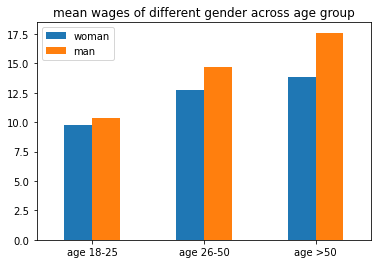

In [8]:
# Exploring the data across age group

women_mean_young = salary['SNHMF1819'].mean()
women_mean_mid = salary['SNHMF2619'].mean()
women_mean_old = salary['SNHMF5019'].mean()
man_mean_young = salary['SNHMH1819'].mean()
man_mean_mid = salary['SNHMH2619'].mean()
man_mean_old = salary['SNHMH5019'].mean()

x = ['age 18-25', 'age 26-50', 'age >50']
y_women = [women_mean_young, women_mean_mid, women_mean_old]
y_men = [man_mean_young, man_mean_mid, man_mean_old]
df = pd.DataFrame(np.c_[y_women, y_men], index=x)
df.plot.bar(rot=0)
plt.title('mean wages of different gender across age group')
plt.legend(['woman', 'man'])
plt.show()

#We see that the gap increases with age (and therefore experience)

### Exploring the data across position level

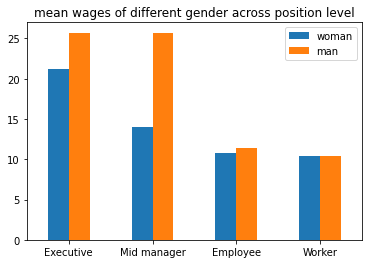

In [9]:
# Exploring the data across position level

women_mean_executive = salary['SNHMFC19'].mean()
women_mean_midmanager = salary['SNHMFP19'].mean()
women_mean_employee = salary['SNHMFE19'].mean()
woman_mean_worker = salary['SNHMFO19'].mean()
man_mean_executive = salary['SNHMHC19'].mean()
man_mean_midmanager = salary['SNHMHC19'].mean()
man_mean_employee = salary['SNHMHE19'].mean()
man_mean_worker = salary['SNHMHO19'].mean()

x = ['Executive', 'Mid manager', 'Employee', 'Worker']
y_women = [women_mean_executive, women_mean_midmanager, women_mean_employee, woman_mean_worker]
y_men = [man_mean_executive, man_mean_midmanager, man_mean_employee, woman_mean_worker]
df = pd.DataFrame(np.c_[y_women, y_men], index=x)
df.plot.bar(rot=0)
plt.title('mean wages of different gender across position level')
plt.legend(['woman', 'man'])
plt.show()


#We see that the gap increases with high-level position

### Creation of a new DataFrame that will separate information for different job level.

In [10]:
# Creation of a new DataFrame that will separate information for different job level.
# DataFrame will have five columns: "CODGEO", "SEX" (1 - for woman, 2 - for man),
#"POSITION" (1 - for workers, 2 - for employees, 3 - for middle manager and 4 - for executive)
# 'AGE' ( 1 for 18-25, 2 for 26-50, 3 for above 50)
# and "WAGE" that will hold mean net salary per hour.

row_fields = {}
row_fields["SNHMFC1819"] = {"GENDER": 1, "POSITION": 4, "AGE": 1}
row_fields["SNHMFP1819"] = {"GENDER": 1, "POSITION": 3, "AGE": 1}
row_fields["SNHMFE1819"] = {"GENDER": 1, "POSITION": 2, "AGE": 1}
row_fields["SNHMFO1819"] = {"GENDER": 1, "POSITION": 1, "AGE": 1}
row_fields["SNHMFC2619"] = {"GENDER": 1, "POSITION": 4, "AGE": 2}
row_fields["SNHMFP2619"] = {"GENDER": 1, "POSITION": 3, "AGE": 2}
row_fields["SNHMFE2619"] = {"GENDER": 1, "POSITION": 2, "AGE": 2}
row_fields["SNHMFO2619"] = {"GENDER": 1, "POSITION": 1, "AGE": 2}
row_fields["SNHMFC5019"] = {"GENDER": 1, "POSITION": 4, "AGE": 3}
row_fields["SNHMFP5019"] = {"GENDER": 1, "POSITION": 3, "AGE": 3}
row_fields["SNHMFE5019"] = {"GENDER": 1, "POSITION": 2, "AGE": 3}
row_fields["SNHMFO5019"] = {"GENDER": 1, "POSITION": 1, "AGE": 3}
row_fields["SNHMHC1819"] = {"GENDER": 2, "POSITION": 4, "AGE": 1}
row_fields["SNHMHP1819"] = {"GENDER": 2, "POSITION": 3, "AGE": 1}
row_fields["SNHMHE1819"] = {"GENDER": 2, "POSITION": 2, "AGE": 1}
row_fields["SNHMHO1819"] = {"GENDER": 2, "POSITION": 1, "AGE": 1}
row_fields["SNHMHC2619"] = {"GENDER": 2, "POSITION": 4, "AGE": 2}
row_fields["SNHMHP2619"] = {"GENDER": 2, "POSITION": 3, "AGE": 2}
row_fields["SNHMHE2619"] = {"GENDER": 2, "POSITION": 2, "AGE": 2}
row_fields["SNHMHO2619"] = {"GENDER": 2, "POSITION": 1, "AGE": 2}
row_fields["SNHMHC5019"] = {"GENDER": 2, "POSITION": 4, "AGE": 3}
row_fields["SNHMHP5019"] = {"GENDER": 2, "POSITION": 3, "AGE": 3}
row_fields["SNHMHE5019"] = {"GENDER": 2, "POSITION": 2, "AGE": 3}
row_fields["SNHMHO5019"] = {"GENDER": 2, "POSITION": 1, "AGE": 3}


reformatted_salary = []
for index, row in salary.iterrows():
    for key, value in row_fields.items(): 
        row_dict = {}
        row_dict["CODGEO"] = row["CODGEO"]
        row_dict["GENDER"] = value["GENDER"]
        row_dict["POSITION"] = value["POSITION"]
        row_dict["AGE"] = value["AGE"]
        row_dict["WAGE"] = row[key]
                   
        reformatted_salary.append(row_dict)
        
reformatted_salary = pd.DataFrame(reformatted_salary)  

In [8]:
reformatted_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CODGEO    7848 non-null   float64
 1   GENDER    7848 non-null   int64  
 2   POSITION  7848 non-null   int64  
 3   AGE       7848 non-null   int64  
 4   WAGE      7848 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 306.7 KB


### Exploring dataset through places of residence 

In [11]:
#Replacing decimal comma
geo["longitude"] = geo["longitude"].apply(lambda x: str(x).replace(',','.'))

In [12]:
##Remove rows with non numeric values
geo = geo[geo["longitude"].apply(lambda x: str(x).isdigit())]

In [13]:
#converting into numeric type
geo["longitude"] = geo["longitude"].astype(float)

In [14]:
# merging town-based dataset and geo file with geographical code for plotting analysis
merged_salary= salary_2.merge(geo, how="left", left_on='CODGEO', right_on="code_insee")

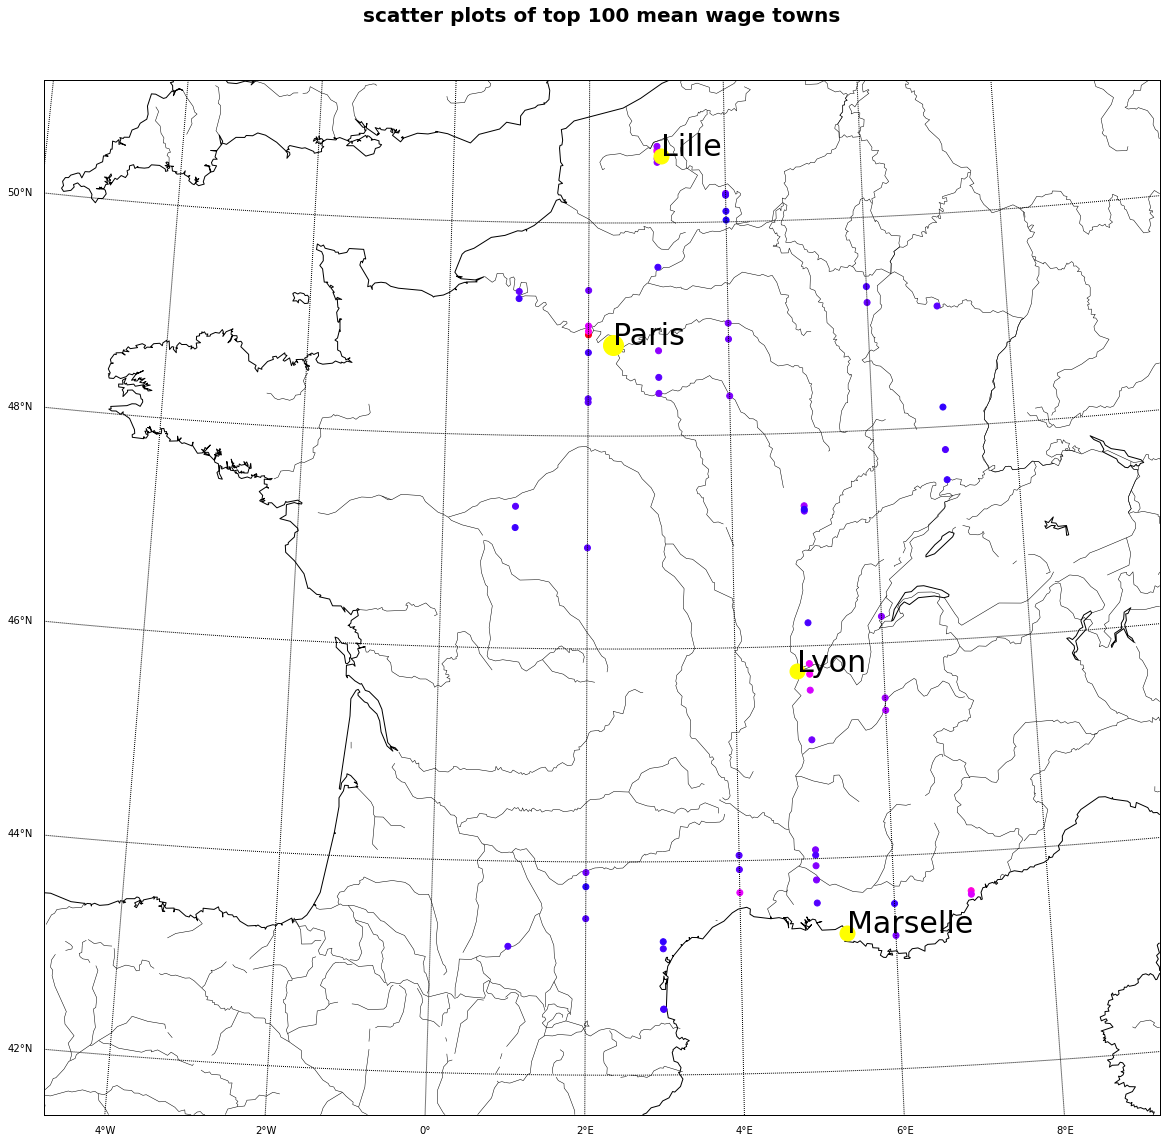

In [15]:
# Load map of France
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as colors

plt.figure(figsize=(20,20))

map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='i',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# scatter high wage towns
lat_long_data = merged_salary[['latitude', 'longitude', 'SNHM19']].dropna(subset=['latitude', 'longitude'])
lat_long_data = lat_long_data[(lat_long_data['latitude'].astype(str) != '-')]
lat_long_data = lat_long_data[(lat_long_data['longitude'].astype(str) != '-')]
lat_long_data = lat_long_data.sort_values(by=["SNHM19"], ascending=False).head(100)
lat_ = lat_long_data['latitude'].astype(float).values.tolist()
long_ = lat_long_data['longitude'].astype(float).values.tolist()
#print (lat_[0])
#print (long_[0])

x1, y1 = map(long_,lat_)
map.scatter(x1, y1, c=lat_long_data['SNHM19'], norm=colors.LogNorm(vmin=1, vmax=max(lat_long_data['SNHM19'])), cmap='hsv', zorder=2)


x_paris, y_paris = map([2.3522], [48.8566])
x_Lille, y_Lille = map([3.0572], [50.6292])
x_Lyon, y_Lyon = map([4.8357], [45.7640])
x_Marseille, y_Marseille = map([5.3698], [43.2965])
# plot single points of large cities
map.plot(x_paris, y_paris, marker='o', markersize = 20, c='yellow')
map.plot(x_Lyon, y_Lyon, marker='o', markersize = 15, c='yellow')
map.plot(x_Marseille, y_Marseille, marker='o', markersize = 15, c='yellow')
map.plot(x_Lille, y_Lille, marker='o', markersize = 15, c='yellow')
plt.annotate('Paris', (x_paris[0], y_paris[0]), fontsize=30)
plt.annotate('Lyon', (x_Lyon[0],y_Lyon[0]), fontsize=30)
plt.annotate('Marselle', (x_Marseille[0], y_Marseille[0]), fontsize=30)
plt.annotate('Lille', (x_Lille[0], y_Lille[0]), fontsize=30)
plt.title('scatter plots of top 100 mean wage towns', fontsize=20, fontweight='bold', y=1.05)
plt.show()

In [218]:
# high wages towns lie near  big cities such as Lyon, Marseille, Lille and Paris

## Checking for correlation of features

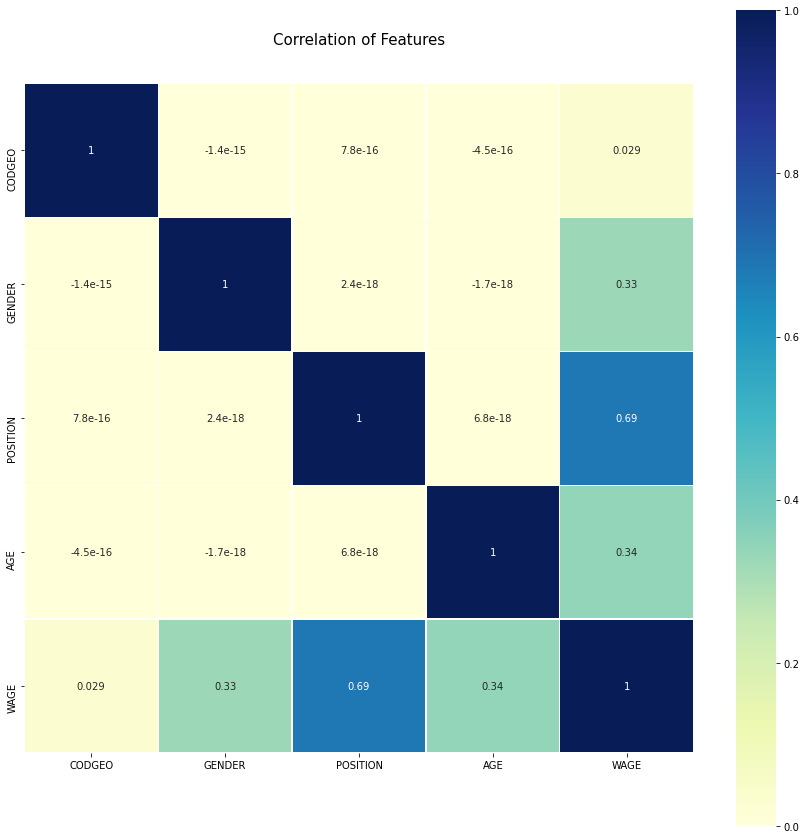

In [16]:
#colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(reformatted_salary.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap='YlGnBu', linecolor='white', annot=True)
plt.show()

We see that the Position level is highly correlated to the dependent variable wage (Pearson R = 0.69).
There is also a weak correlation between Gender and Wage (0.33), and a weak correlation between Age and Wage (0.34)

A summary description:

The 2019 INSEE Salary Dataset was loaded into a Panda Dataframe to prepare the exploration of data.
The final model must be able to easily reflect the relation between features, due to the very unfavorable data structure we were forced to create a new DataFrame and fill it based on properly processed data from salary dataset. So it was necessary to create new numeric features : Gender, Position level and Age for prediction of the target (Wage). 
Thanks to the exploration of data, we can notice that:
Wages are highly correlated to the position level (Pearson R correlation is 0.69).
Gender plays a role in wage as well - women are paid relatively less than men and the disparity (percentage wise) increases at higher ages (Pearson R is 0.33). Disparity increases also with High level positions (Manager, Executive).
Location (CODGEO) can play a role in definition of wages (large cities can be more dynamic about employment).


# Results

Fit your model(s) here, optimize, and finally report the validation statisitcs. Use comments `#` where relevant to clarify the steps.

In [ ]:
# Linear Regression analysis seems like an intuitive model to predict mean wages. 
# Several ML regression models will be trained on the dataset: a linear regression model, a decision tree,
# a random forest regressor, and ensemble methods such as Gradient Boosting and Ada Boosting.
# The best ML model will be chosen to predict the values of the test set.
# The models will be evaluated using key regression metrics: The mean absolute error and the R2_score.
# The Model Tuning Approaches to optimize the performance of the tree-based and ensemble models are:
# the RandomizedSearchCV, the GridSearchCV, and Bagging

## Splitting dataset into training and testset

In [17]:
X, y = reformatted_salary.drop("WAGE", axis="columns"), reformatted_salary['WAGE']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## 1st MODEL : Linear Regression model / Baseline model

In [ ]:

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)

### Predicting the Test set results
y_pred = LR.predict(X_test)

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def regress_eval(model, X_test, y_test):
    y_pred = model.predict(X_test)
    results = {'MAE': mean_absolute_error(y_test, y_pred), 
     'MSE': mean_squared_error(y_test, y_pred), 
     'RMSE': mean_squared_error(y_test, y_pred, squared=False),
     'R2': r2_score(y_test, y_pred)}
    return results

regress_eval(LR, X_test, y_test)

# With Linear Regression, 68% of the metric features explains the Wage.
# Mean Absolute Error is 1.4

{'MAE': 1.4251974038390716,
 'MSE': 3.9877302303950724,
 'RMSE': 1.996930201683342,
 'R2': 0.68292304189236}

## 2nd Model: Decision Tree Model

In [21]:

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.inspection import permutation_importance

In [22]:
dtr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = dtr.predict(X_test)

In [23]:
regress_eval(dtr, X_test, y_test)

# With Decision Tree, 93% of the metric features explains the wage. The score is far better than the baseline model.
# MAE is 0.59

{'MAE': 0.59658392506977,
 'MSE': 0.8475867052538955,
 'RMSE': 0.9206447226014471,
 'R2': 0.9326057183643146}

In [24]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

### Optimization of the Decision Tree

In [25]:
dtr_grid_tune = DecisionTreeRegressor()
parameters = {'max_depth': np.arange(2,7), 
              'criterion': ['squared_error'],
             # 'min_samples_leaf': [5, 10, 20, 25]
              # 'min_samples_leaf': [1, 2, 4]
              'min_samples_leaf': [1, 5, 10]
             }
gridCV = GridSearchCV(dtr_grid_tune, parameters, cv=10)
gridCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': array([2, 3, 4, 5, 6]),
                         'min_samples_leaf': [1, 5, 10]})

In [26]:
regress_eval(gridCV, X_test, y_test)
# With Decision Tree tunes, 86% of the metric features explains the wage. 
# MAE is 0.76
#The score is not optimized

{'MAE': 0.7609467539797623,
 'MSE': 1.749474737533901,
 'RMSE': 1.3226771100816332,
 'R2': 0.8608937676286958}

### Tuning the Decision Tree with Bagging

In [27]:
from sklearn.ensemble import BaggingRegressor
bagged_dtr_grid_tune = BaggingRegressor(DecisionTreeRegressor())

parameters = {'base_estimator__max_depth': np.arange(2,7), 
              'base_estimator__criterion': ['squared_error'],
            #  'base_estimator__min_samples_leaf': [5, 10, 20, 25]
              'base_estimator__min_samples_leaf': [1, 2, 4]
            #  'base_estimator__min_samples_split': [2, 5, 10]
             }

bagged_gridCV = GridSearchCV(bagged_dtr_grid_tune, parameters, cv=10)
bagged_gridCV.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             param_grid={'base_estimator__criterion': ['squared_error'],
                         'base_estimator__max_depth': array([2, 3, 4, 5, 6]),
                         'base_estimator__min_samples_leaf': [1, 2, 4]})

In [28]:
regress_eval(bagged_gridCV, X_test, y_test)

{'MAE': 0.7354143468435873,
 'MSE': 1.5881126249686301,
 'RMSE': 1.2602034061883145,
 'R2': 0.8737241761192295}

In [ ]:
### The bagging of the tree has not optimized the score model, 87% of the metric features explains the wage.
# MAE is 0.73

In [29]:
pd.DataFrame([gridCV.score(X_test, y_test), bagged_gridCV.score(X_test, y_test), dtr.score(X_test, y_test)], 
             index = ['grid search', "bagged grid CV", "default parameters"], 
             columns = ['R2'])

,R2
grid search,0.860894
bagged grid CV,0.873724
default parameters,0.932606


In [ ]:
# Despite multiple changes of the hyperparameters, the optimization of the trees is not a success.

## Using Decision Tree to Evaluate Feature Importance / Model understanding / Features contribution

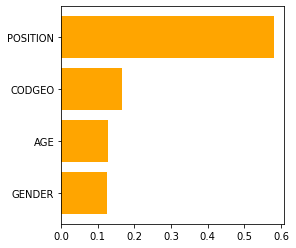

In [30]:
importances = dtr.feature_importances_
columns = X.columns

dtr_importances = pd.DataFrame(importances, index=columns,columns=['Importance']).sort_values(by='Importance',ascending=True)

plt.figure(figsize=(4,4))
plt.barh(dtr_importances.index, dtr_importances.Importance, color = 'orange')
plt.show()

In [31]:
feats = dtr.feature_names_in_

In [ ]:
# We see that Position is the most important feature to evaluate the wage with the tree-based Predictor,
# With the Tree Predictor, we notice that CODGEO is a more important feature than age and gender
# We notice that Age and Gender play a small role in definition of wage with this method.
# Nethertheless, it underlines the Gender wage gap in France.


### Using feature importance to train the decision tree model

In [32]:
dtr.fit(X_train[feats], y_train)

DecisionTreeRegressor()

In [33]:
# Predicting the Test set results
y_pred = dtr.predict(X_test[feats])

regress_eval(dtr, X_test[feats], y_test)

{'MAE': 0.5943338511057893,
 'MSE': 0.8378383745810674,
 'RMSE': 0.9153351159990899,
 'R2': 0.9333808387605761}

In [ ]:
# With Feature importance, 93.33% of the metric features explains the wage. 

## 3rd model: RANDOM FOREST

In [ ]:
# 3rd model: RANDOM FOREST

In [69]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test)

In [70]:
regress_eval(rfr, X_test, y_test)

{'MAE': 0.5514584128007854,
 'MSE': 0.7296542756514827,
 'RMSE': 0.8541980306998388,
 'R2': 0.9419828963277477}

In [ ]:
# With Random forest model, 94% of the metric features explains the wage.
# MAE is 0.55

### Optimization of Random Forest

In [148]:
# Random Forest parameter overview 
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [71]:
# Random forest score before Tuning
rfr.fit(X_train, y_train)
no_tuning_R2 = rfr.score(X_test, y_test)
no_tuning_R2

0.9419828963277477

In [72]:
#Range of parameters to evaluate

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

#### Using Random Search to Identify Optimal Parameters

In [73]:
#Using Random Search to Identify Optimal Parameters
random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [74]:
rfr_random_search = RandomizedSearchCV(estimator = rfr, 
                               param_distributions = random_search,
                               n_iter = 20, 
                               cv = 3, 
                               verbose=0, 
                               random_state=42, n_jobs = -1)

In [75]:
rfr_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 208, 216, 224,
                                                         232, 240, 248, 256,
                                                         264, 272, 280, 288,
                                                         296, 305, 313, 321,
                                                         329, 337, 345, 353,
                                                         361, 369, 377, 385,
                                                         393, 402, 410, 418,
                                                         426, 434, ...]},
                   random_state=42)

In [76]:
best_random = rfr_random_search.best_estimator_
random_search_R2 = best_random.score(X_test, y_test)
random_search_R2
#With the optimization of the forest, R2 is 93.47%, MAE is 0.55, it is not optimized

0.9347380410842782

In [77]:
regress_eval(rfr_random_search, X_test, y_test)

{'MAE': 0.5551801531657721,
 'MSE': 0.8207694687630922,
 'RMSE': 0.9059632822378025,
 'R2': 0.9347380410842782}

#### Using Grid Search to Identify Optimal Parameters

In [78]:
grid_search = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 500]
}

grid_search = GridSearchCV(estimator = rfr, param_grid = grid_search, 
                          cv = 3, n_jobs = -1, verbose = 0)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 500]})

In [80]:
best_grid_search = grid_search.best_estimator_
grid_search_R2 = best_grid_search.score(X_test, y_test)
grid_search_R2
#With Grid Search, R2 score is 90.89%, it is not optimized

0.9089657206202575

In [81]:
pd.DataFrame([random_search_R2, grid_search_R2, no_tuning_R2], 
             index = ['random search', "grid search", "default parameters"], 
             columns = ['R2'])

,R2
random search,0.934738
grid search,0.908966
default parameters,0.941983


In [ ]:
# For the moment Random forest has the best r2 score to predict wage (R2_score of 94.19%, MAE is 0.55)

## Evaluation of Feature Importance using Random Forest 

In [60]:
#Feature Importance with Random Forest
rfr.feature_importances_

array([0.16651723, 0.1277227 , 0.57997417, 0.1257859 ])

Text(0.5, 0, 'Permutation Importance (from scikit-learn)')

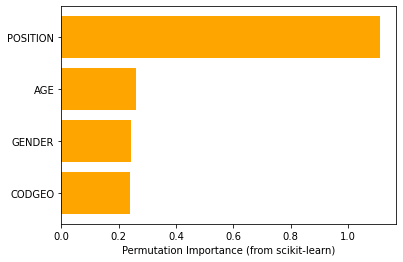

In [61]:
#from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rfr, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(reformatted_salary.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color = "orange")
plt.xlabel("Permutation Importance (from scikit-learn)")

In [ ]:
# We see that Position is the most important feature to evaluate the wage with the RF Predictor,
# We notice that (before the location), Age and Gender play a small role in definition of wage with this method.
# Nethertheless, it underlines the Gender wage gap in France.

In [64]:
feats_rfr = rfr.feature_names_in_

### Using feature importance to train the Random Forest model

In [67]:
rfr.fit(X_train[feats_rfr], y_train)

# Predicting the Test set results
y_pred = rfr.predict(X_test[feats_rfr])

In [68]:
regress_eval(rfr, X_test[feats_rfr], y_test)

{'MAE': 0.5514584128007854,
 'MSE': 0.7296542756514827,
 'RMSE': 0.8541980306998388,
 'R2': 0.9419828963277477}

## 4th model / Ensemble Methods : Boosting

In [83]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

In [84]:
gbr.fit(X_train, y_train)
abr.fit(X_train, y_train)

print("GBR:", (regress_eval(gbr, X_test, y_test)))
print("ABR:", (regress_eval(abr, X_test, y_test)))

GBR: {'MAE': 0.5890670051432877, 'MSE': 0.9055760257570044, 'RMSE': 0.9516175837788016, 'R2': 0.9279948053171617}
ABR: {'MAE': 1.4565592475068927, 'MSE': 3.4259063618321632, 'RMSE': 1.8509204093726352, 'R2': 0.7275954226563277}


In [88]:
no_tuning_GBR = gbr.score(X_test, y_test)

In [ ]:
# Gradient Boosting has a better score (R2 is 0.927) than Adaboost

In [86]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
params={'subsample':[0.65, 0.7, 0.75],
       # 'n_estimators':[300, 500, 1000],
          'n_estimators':[100, 300, 700],
         'learning_rate':[0.05, 0.075, 0.1]}

### Tuning with Randomized Search

In [89]:
# Tuning with Randomized Search

gbr_tuned = RandomizedSearchCV(gbr, params, n_iter=10, cv=10, n_jobs=-1, random_state=2)
gbr_tuned.fit(X_train, y_train)


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.075, 0.1],
                                        'n_estimators': [100, 300, 700],
                                        'subsample': [0.65, 0.7, 0.75]},
                   random_state=2)

In [90]:
print("GBR_tuned:", (regress_eval(gbr_tuned, X_test, y_test)))

GBR_tuned: {'MAE': 0.34134715015288813, 'MSE': 0.27488513991628877, 'RMSE': 0.5242948978545269, 'R2': 0.9781430189712169}


In [91]:
GBR_tuned = gbr_tuned.score(X_test, y_test)
# GBR has the best r2 score optimized with Random Search : 0.97 and MAE is 0.35

### Tuning with Bagging

In [93]:
# Tuning with Bagging

bagged_gbr = BaggingRegressor(GradientBoostingRegressor())
bagged_gbr.fit(X_train, y_train)

BaggingRegressor(base_estimator=GradientBoostingRegressor())

In [94]:
print("bagged_gbr:", (regress_eval(bagged_gbr, X_test, y_test)))

bagged_gbr: {'MAE': 0.5932106164213702, 'MSE': 0.9197235906243506, 'RMSE': 0.9590222054907543, 'R2': 0.9268698879898619}


In [95]:
bagged_GBR = bagged_gbr.score(X_test, y_test)

In [96]:
pd.DataFrame([no_tuning_GBR, bagged_GBR, GBR_tuned], 
             index = ['GBR Default', "Bagged GBR", "Random Search GBR",], 
             columns = ['R2'])

,R2
GBR Default,0.927995
Bagged GBR,0.926870
Random Search GBR,0.978143


In [ ]:
# Gradient Boosting tuned with Random Search method has the best metrics to predict the wage in this model (r2 is 0.978 and MAE is 0,35)

# Conclusions

What can we conclude? Is the model successful? How will it be used? Importantly, what are some limitations that you might need to address going forward?

In conclusion, The best model (The Gradient Boosting Regressor) shows that the algorithm is successful to predict an hourly mean wage based on the position level, age, gender, and location. The R2_score (97.8%) of the best model enables accurate predictions of the mean wage samples.
The preliminary analysis showed trends and patterns in gender pay disparities between male and female employees.
The predictive model can be a tool for HR staff to ensure accuracy in mandatory annual reports, and consequently reduce expenses related to the French government fines. It can help companies to close gender inequality barriers and allow women to see the same advancement and progression as their male counterparts.

Limitations of the model:
As the data is highly aggregated (it comes from a French official source), we could only see a high-level analysis of the situation.
Additional social factors such as education, seniority, and household information (having children or not), would be highly helpful to explain the gender wage gap in France. 
Because many local factors affect pay, we should try to separately measure them to understand how each impacts pay. In addition to gender, this comparison would ensure we have accounted for all the detailed differences in education, experience, type of job role, and other factors that differ between men and women of a similar position.


# Bonus (Explainable AI)

In the real world, people are rightfully skeptical when they hear about AI/ML success. Help build confidence in the model's predictions by using tools in the Week 10 Notebook. 

## Performing Interpretability functions helped with TreeExplainer and the Random Forest estimators

In [107]:
#!pip install shap

In [97]:
# Performing interpretability functions (tree explainer) to see "feature contributions" to the predictions of the 
# tree-based model (Random Forest)

import shap

In [99]:
explainer = shap.TreeExplainer(rfr)
shap_values = explainer.shap_values(X_train)
expected_value = explainer.expected_value

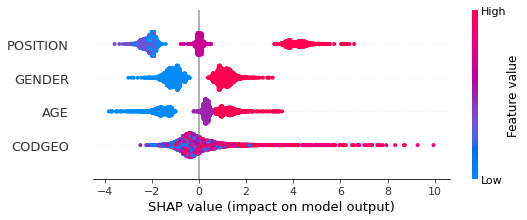

In [100]:
shap.summary_plot(shap_values, X_train, title="Summary Plot") 
# Plotting the "feature contributions" to the predictions

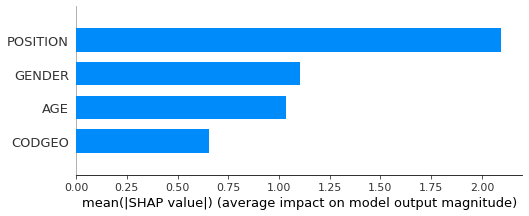

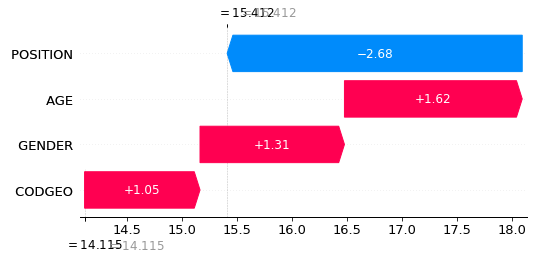

In [101]:
# Check features that contribute to the efficiency of the model / Interaction Plots

shap.summary_plot(shap_values, X_train, plot_type="bar") 

shap.plots._waterfall.waterfall_legacy(expected_value[0], shap_values[2], 
                                   features=X_train.iloc[3,:],
                                    feature_names=X_train.columns, 
                                       max_display=4, show=True)

# We see the features average impact on model magnitude below.  


## Explaining Models with ExplainerDashboards

In [108]:
# Explaining Models with ExplainerDashboards

#!pip install explainerdashboard

In [102]:
from explainerdashboard import ExplainerDashboard


In [109]:
# Evaluating contribution and importance of the features by capturing dependence plots
#!pip install dalex


In [104]:
import dalex
explainer = dalex.Explainer(rfr,X_train,y_train ) 


Preparation of a new explainer is initiated

  -> data              : 6278 rows 4 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 6278 values
  -> model_class       : sklearn.ensemble._forest.RandomForestRegressor (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_default at 0x0000021148BD94C0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 9.05, mean = 14.1, max = 36.8
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -3.02, mean = 0.000335, max = 5.18
  -> model_info        : package sklearn

A new explainer has been created!


In [110]:
# Plotting importance of features / dependence_plot to see interaction between different features

explainer.model_parts().plot(max_vars=5)

explainer.model_performance(model_type='regression').plot(geom='roc')

# As already mentionned before the conclusion,
# We see that Position is the most important feature to evaluate the wage with the Random Forest Predictor ,
# then the Age and the Gender play a small role in definition of wage. Nethertheless,
# it underlines the Gender wage gap in France.
# Location (CODGEO) can play a role in definition of wages (large cities can be more dynamic about employment)


Calculating ceteris paribus: 100%|███████████████████████████████████████████████████████| 4/4 [00:00<00:00, 27.75it/s]


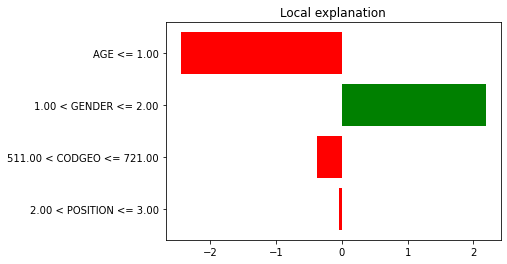

In [106]:

explainer.predict_parts(X_train.iloc[50, :],type="shap").plot(min_max=[0,1],max_vars=5)

explainer.predict_parts(X_train.iloc[50, :], type='break_down_interactions').plot(max_vars=5)

explainer.model_performance(model_type = 'regression').plot()

explainer.model_profile(type = 'partial', label="pdp").plot()

explainer.predict_surrogate(X_train.iloc[[50]]).plot()

arena=dalex.Arena()

arena.push_model(explainer)

arena.push_observations(X_test)

# Plotting the "feature contributions" to the Random Forest prediction

In [40]:
explainer.model_diagnostics().result

,CODGEO,GENDER,POSITION,AGE,y,y_hat,residuals,abs_residuals,label,ids
1063,142.0,1,1,2,11.640350,11.556499,0.083850,0.083850,RandomForestRegressor,1
443,61.0,1,1,3,13.208700,12.124074,1.084626,1.084626,RandomForestRegressor,2
6262,773.0,2,2,3,15.260752,15.922680,-0.661928,0.661928,RandomForestRegressor,3
84,14.0,2,4,1,18.085287,18.447237,-0.361950,0.361950,RandomForestRegressor,4
6155,762.0,1,1,3,12.323427,12.279752,0.043675,0.043675,RandomForestRegressor,5
...,...,...,...,...,...,...,...,...,...,...
4931,621.0,1,1,3,12.038278,11.725780,0.312498,0.312498,RandomForestRegressor,6274
3264,423.0,1,4,1,15.261167,15.257950,0.003217,0.003217,RandomForestRegressor,6275
1653,222.0,2,3,3,15.551179,16.110123,-0.558945,0.558945,RandomForestRegressor,6276
2607,336.0,2,1,1,11.226096,11.103840,0.122257,0.122257,RandomForestRegressor,6277
